#### Sellmeier_control_stage.vi 实验测试
data was measured at 2025.7.17 in measured.csv

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取CSV文件并去除列名中的空格
data = pd.read_csv('measured.csv')
data.columns = data.columns.str.strip()  # 去除列名中的空格

# 提取数据列
cor_angle = data['cor_angle']
signal_wavalength = data['signal_wavalength']
idler_power = data['idler_power']
SHG_power = data['SHG_power']

# 绘制SHG功率与角度的关系图
# plt.figure(figsize=(10, 6))
# plt.plot(data['signal_wavalength'], data['cor_angle'], marker='o', linestyle='-', color='r', label=r'Corrected angle ($^{\circ}$)')
# plt.xlabel('Signal wavelength (nm)')
# plt.ylabel(r'Corrected angle ($^{\circ}$)')
# plt.title('Signal wavelength vs Cor Angle')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()

# 保存带有processed列的新CSV文件
data.to_csv('processed.csv', index=False)
print('已保存为 processed.csv')

已保存为 processed.csv


#### sellmeier eq
then process the signal wavelength, then plus the cor_angle to get the SHG angle

In [39]:
def no(lam): ## in um units
    no = np.sqrt(1+(0.90291*lam**2/(lam**2-0.003926))+(0.83155*lam**2/(lam**2-0.018786))+(0.76536*lam**2/(lam**2-60.01)))
    return no
def ne(lam):## in um units
    ne = np.sqrt(1+(1.151075*lam**2/(lam**2-0.007142))+(0.21803*lam**2/(lam**2-0.02259))+(0.656*lam**2/(lam**2-263)))
    return ne
def opo532(w):  # w, as signal wavelength in um
    w_idler = 1/(1/0.532 - 1/w)  # now w is idler wavelength
    return w_idler
def theta(w): # w, as fundamental wavelength in um
    w2 = w/2 # shg
    theta = np.arcsin(np.sqrt((ne(w2)/no(w))**2 * (no(w2)**2 - no(w)**2) / (no(w2)**2 - ne(w2)**2)))
    return theta * 180 / np.pi

In [40]:
idler_wavelength = opo532(signal_wavalength / 1000)*1000  # Convert nm to um for calculation
calculated_angles = theta(idler_wavelength / 1000)
actual_angles = calculated_angles + cor_angle
data['calculated_angle'] = calculated_angles
data['idler_wavelength'] = idler_wavelength
data['shg_wavelength'] = idler_wavelength / 2
data['actual_angle'] = actual_angles
data.to_csv('processed.csv', index=False)

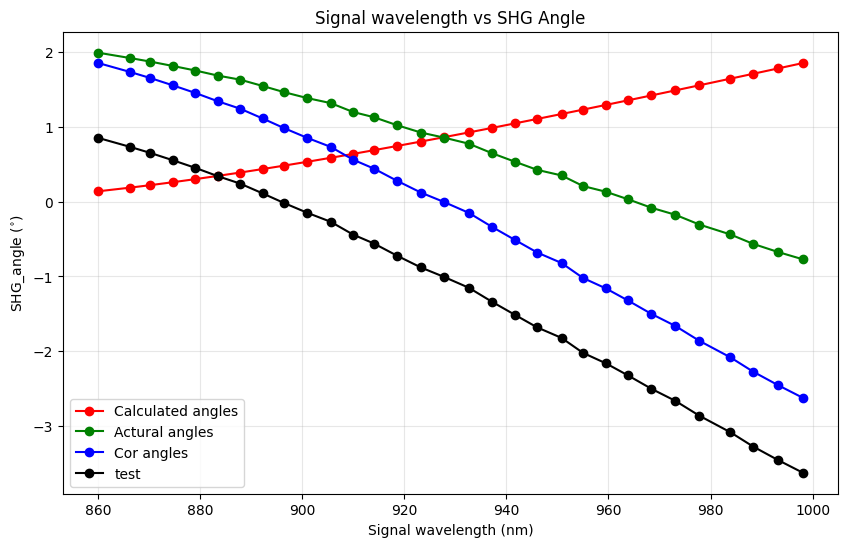

In [44]:
# 绘制
plt.figure(figsize=(10, 6))
plt.plot(signal_wavalength, calculated_angles-20, marker='o', linestyle='-', color='r', label='Calculated angles')
plt.plot(signal_wavalength, cor_angle+calculated_angles-90, marker='o', linestyle='-', color='g', label='Actural angles')
plt.plot(signal_wavalength, cor_angle-70, marker='o', linestyle='-', color='b', label='Cor angles')
plt.plot(signal_wavalength, cor_angle-71, marker='o', linestyle='-', color='black', label='test')

plt.xlabel('Signal wavelength (nm)')
plt.ylabel(r'SHG_angle ($^{\circ}$)')
plt.title('Signal wavelength vs SHG Angle')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()